In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

from helper import IOHelper # from https://github.com/const-ae/Neural_Network_DNA_Demo


In [2]:
data_dir = "/Users/bjarnold/Princeton_EEB/Kocher/DeepSTARR/DeepSTARR/DeepSTARR"
out_dir = "/Users/bjarnold/Princeton_EEB/Kocher/STARRseq/homer/Dmel"

def prepare_input(data_dir, set, tasks, samples=None, random_state=None):
    file_seq = f'{data_dir}/Sequences_{set}.fa'
    input_fasta_data_A = IOHelper.get_fastas_from_file(file_seq, uppercase=True)
    print(input_fasta_data_A.head())

    # get length of first sequence
    sequence_length = len(input_fasta_data_A.sequence.iloc[0])

    # Convert sequence to one hot encoding matrix
    # seq_matrix_A = SequenceHelper.do_one_hot_encoding(input_fasta_data_A.sequence, sequence_length,
    #                                                   SequenceHelper.parse_alpha_to_seq)
    # print(seq_matrix_A.shape)
    # print(seq_matrix_A[0,:,:].shape)
    # print(seq_matrix_A[0,:,:])

    # X = np.nan_to_num(seq_matrix_A) # Replace NaN with zero and infinity with large finite numbers
    # X_reshaped = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    Activity = pd.read_table(f'{data_dir}/Sequences_activity_{set}.txt')
    Y_dev = Activity.Dev_log2_enrichment
    Y_hk = Activity.Hk_log2_enrichment
    Y = []
    if "Dev" in tasks:
        Y.append(Y_dev)
    if "Hk" in tasks:
        Y.append(Y_hk)
    Y = np.array(Y).T
    print(set)
    print("input_fasta_data_A.shape", input_fasta_data_A.shape)
    # print("seq_matrix_A.shape", seq_matrix_A.shape)
    # print("X_reshaped.shape", X_reshaped.shape)
    print("Y.shape", Y.shape)

    return input_fasta_data_A, Y


In [3]:
tasks = ['Hk']
X_train_sequence, Y_train = prepare_input(data_dir, "Train", tasks)


                             location  \
0    chr2L_5587_5835_+_positive_peaks   
1    chr2L_5778_6026_+_positive_peaks   
2  chr2L_14226_14474_+_positive_peaks   
3  chr2L_18618_18866_+_positive_peaks   
4  chr2L_34121_34369_+_positive_peaks   

                                            sequence  
0  ATTCAGATTGCCTCTCATTGTCTCACCCATATTATGGGAACCAAAT...  
1  AAATGGCCGCTCAAGAAAAGGCTCGAATATATATTGCCTGCCTCTC...  
2  ATAAGGATCAAAAAGTCCTGATTTCCGAAATGGCGGTTCTCCTTCA...  
3  TTTCCATGACTGACTGGAATGGGTGGAGAACATCGCTTTGGGAGTG...  
4  TCTATCGACCCATAGCCGTAGTCGCTAGACCCGCCCTTCGGAGCAT...  
Train
input_fasta_data_A.shape (402296, 2)
Y.shape (402296, 1)


<Axes: ylabel='Count'>

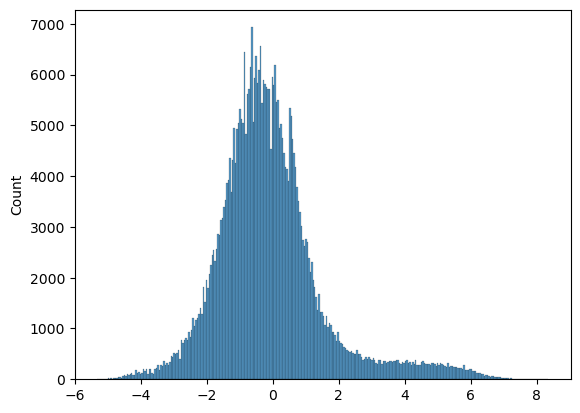

In [4]:
sns.histplot(Y_train[:,0])

In [5]:
# get indices of Y_train that are > 1.5
indices_high = np.where(Y_train[:,0] > 1.5)[0]
indices_low = np.where(Y_train[:,0] < 0)[0]

In [6]:
len(indices_high)

45906

In [7]:
print(len(X_train_sequence.iloc[indices_high]))
print(len(Y_train[indices_high,0]))

45906
45906


In [8]:
seqs_high = X_train_sequence.iloc[indices_high]
seqs_low = X_train_sequence.iloc[indices_low]


In [9]:
# randomly sample 3000 rows from seqs_high
seqs_high_sample = seqs_high.sample(n=3000, random_state=42)
# seqs_low_sample = seqs_low.sample(n=3000, random_state=42)

In [10]:
seqs_high_sample

,location,sequence
309660,chrX_19760255_19760503_-_peak_849bp_region,AGAAAACGAGGAAAAACACTTTTACGAATCCTCCCCCTCTCACGTA...
398585,chr2LHet_348501_348749_-_negative,CATTAATTCGGAATGCCTCCTCTACTTTTAAAGCGTTGTTCCTTCT...
170805,chr3L_23605501_23605749_+_negative,ATTATATATATTATTATATATTATATATTATATATATATATATATA...
211933,chr3R_21160868_21161116_-_positive_peaks,CCGTAGTGAGCTCGCTTAGCTCATGATTTTCAACTAGAATGTTTAT...
218064,chr2L_20886047_20886295_-_positive_peaks,AGCTATTTATAAAGGTATTTTCACTAGATTTGGATGTTTTCTCTAA...
...,...,...
325847,chrX_8455557_8455805_-_peak_849bp_region,CGTACACCCACACACATTTACAGCAGGCCATCGCGCACATGTACTT...
217424,chr2L_2045356_2045604_-_positive_peaks,AAGCAATTAATGTAAGTGTTTTTAATTTTCCTCAGGATATTTACAC...
316034,chr3L_3225306_3225554_-_peak_849bp_region,ACGCAAGTCAAGGCATGCGTTCACGCTTTTCGTTAACGATTATTGC...
53294,chr3L_14552835_14553083_+_peak_849bp_region,AAAGAGAATTCCAAATTTACATGTAAAATGTAATGTCAAGTGTTAT...


In [11]:
with open(f"{out_dir}/Dmel_high.fa", "w") as f:
    for i,r in seqs_high_sample.iterrows():
        f.write(f">{r.location}\n")
        f.write(f"{r.sequence}\n")

with open(f"{out_dir}/Dmel_low.fa", "w") as f:
    for i,r in seqs_low_sample.iterrows():
        f.write(f">{r.location}\n")
        f.write(f"{r.sequence}\n")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bjarnold/Princeton_EEB/Kocher/STARRseq/homer_test/Dmel/Dmel_high.fa'